In [5]:
# importing the required libraries
import pandas as pd
# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins
# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12
# Disable warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [6]:
# Reading the datasets
data = pd.read_csv('covid_19_data.csv')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236017 entries, 0 to 236016
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   SNo              236017 non-null  int64 
 1   ObservationDate  236017 non-null  object
 2   Province/State   173972 non-null  object
 3   Country/Region   236017 non-null  object
 4   Last Update      236017 non-null  object
 5   Confirmed        236017 non-null  int64 
 6   Deaths           236017 non-null  int64 
 7   Recovered        236017 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 14.4+ MB


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236017 entries, 0 to 236016
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   SNo              236017 non-null  int64 
 1   ObservationDate  236017 non-null  object
 2   Province/State   173972 non-null  object
 3   Country/Region   236017 non-null  object
 4   Last Update      236017 non-null  object
 5   Confirmed        236017 non-null  int64 
 6   Deaths           236017 non-null  int64 
 7   Recovered        236017 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 14.4+ MB


In [4]:
#Changing Data Type of the Date Column
data['ObservationDate'] = data['ObservationDate'].astype('datetime64[ns]')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236017 entries, 0 to 236016
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   SNo              236017 non-null  int64         
 1   ObservationDate  236017 non-null  datetime64[ns]
 2   Province/State   173972 non-null  object        
 3   Country/Region   236017 non-null  object        
 4   Last Update      236017 non-null  object        
 5   Confirmed        236017 non-null  int64         
 6   Deaths           236017 non-null  int64         
 7   Recovered        236017 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 14.4+ MB


In [7]:
data.drop(['SNo'],axis=1,inplace=True)
data['Total cases'] = data['Confirmed'] 
total_cases = data['Total cases'].sum()
print('Total number of confirmed COVID 2019 cases across Globe:', total_cases)

Total number of confirmed COVID 2019 cases across Globe: 13490258924


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236017 entries, 0 to 236016
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ObservationDate  236017 non-null  datetime64[ns]
 1   Province/State   173972 non-null  object        
 2   Country/Region   236017 non-null  object        
 3   Last Update      236017 non-null  object        
 4   Confirmed        236017 non-null  int64         
 5   Deaths           236017 non-null  int64         
 6   Recovered        236017 non-null  int64         
 7   Total cases      236017 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 14.4+ MB


In [9]:
#Total Active  is the Total cases - (Number of death + Cured)
data['Total Active'] = data['Total cases'] - (data['Deaths'] + data['Recovered'])
total_active = data['Total Active'].sum()
print('Total number of active COVID 2019 cases across Globe:', total_active)
Tot_Cases = data.groupby('Country/Region')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 2019 cases across Globe: 5131011486


,Total Active
Country/Region,
US,2625697316
UK,366796943
France,342312350
Spain,280545538
Brazil,154590508
India,126226173
Netherlands,103830103
Russia,95971400
Belgium,86832647


<AxesSubplot:xlabel='Recovered', ylabel='Country/Region'>

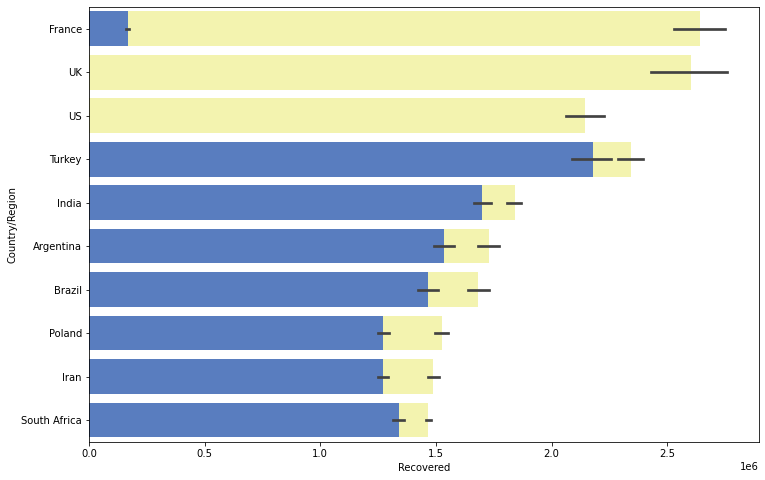

In [41]:
f, ax = plt.subplots(figsize=(12, 8))
data1 = data[['Country/Region','Total cases','Recovered','Deaths']]
data1.sort_values('Total cases',ascending=False,inplace=True)
data2 = data1.nlargest(1000, 'Total cases')
sns.set_color_codes("pastel")
sns.barplot(x="Total cases", y="Country/Region", data=data2,label="Total", color="y")
sns.set_color_codes("muted")
sns.barplot(x="Recovered", y="Country/Region", data=data2, label="Recovered", color="b")

array([[<AxesSubplot:title={'center':'Confirmed'}>,
        <AxesSubplot:title={'center':'Deaths'}>],
       [<AxesSubplot:title={'center':'Recovered'}>,
        <AxesSubplot:title={'center':'Total cases'}>],
       [<AxesSubplot:title={'center':'Total Active'}>, <AxesSubplot:>]],
      dtype=object)

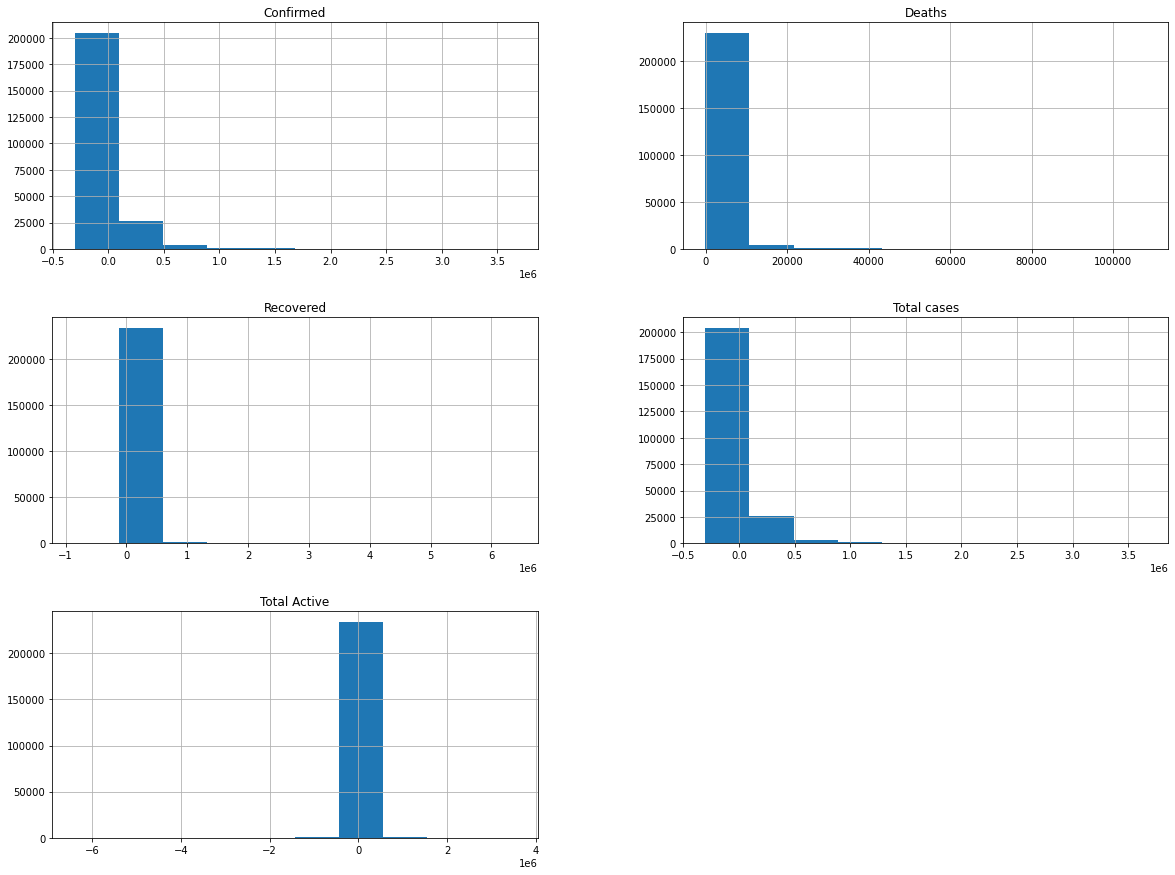

In [47]:
#Histogram to check the distribution
data[data.dtypes[(data.dtypes=="int64")].index.values].hist(figsize=[20,15])

## Timeseries Forecast with Fbprophet Library

In [53]:
from fbprophet import Prophet
confirmed = data.groupby('ObservationDate').sum()['Confirmed'].reset_index()
deaths = data.groupby('ObservationDate').sum()['Deaths'].reset_index()
recovered = data.groupby('ObservationDate').sum()['Recovered'].reset_index()

In [54]:
confirmed.head(10)

,ObservationDate,Confirmed
0,2020-01-22,557
1,2020-01-23,1097
2,2020-01-24,941
3,2020-01-25,1437
4,2020-01-26,2118
5,2020-01-27,2927
6,2020-01-28,5578
7,2020-01-29,6165
8,2020-01-30,8235
9,2020-01-31,9925


In [55]:
confirmed.columns = ['ds','y']
confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
confirmed.tail()

,ds,y
398,2021-02-23,112109754
399,2021-02-24,112554301
400,2021-02-25,113001412
401,2021-02-26,113415604
402,2021-02-27,113784735


## Forecasting Confirmed COVID-19 Cases Worldwide with Prophet (Base model)

In [56]:
m = Prophet(interval_width=0.95) 
m.fit(confirmed) 
future = m.make_future_dataframe(periods=7) 
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
405,2021-03-02
406,2021-03-03
407,2021-03-04
408,2021-03-05
409,2021-03-06


In [57]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
405,2021-03-02,1.188323e+08,1.176813e+08,1.201345e+08
406,2021-03-03,1.194330e+08,1.180461e+08,1.207317e+08
407,2021-03-04,1.200477e+08,1.187535e+08,1.213423e+08
408,2021-03-05,1.206452e+08,1.193694e+08,1.218979e+08
409,2021-03-06,1.212115e+08,1.199737e+08,1.223683e+08


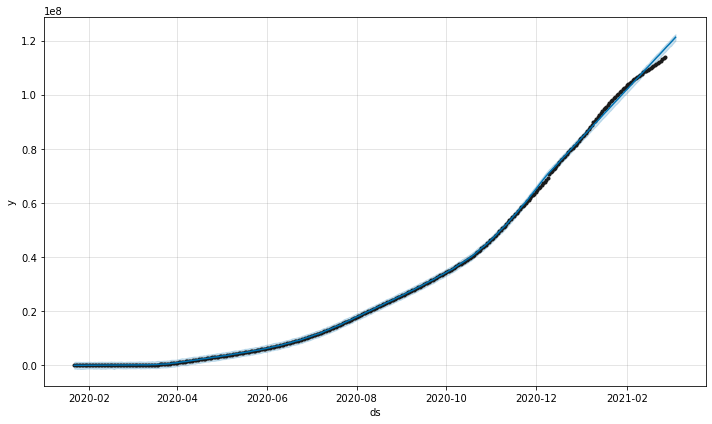

In [58]:
confirmed_forecast_plot = m.plot(forecast)

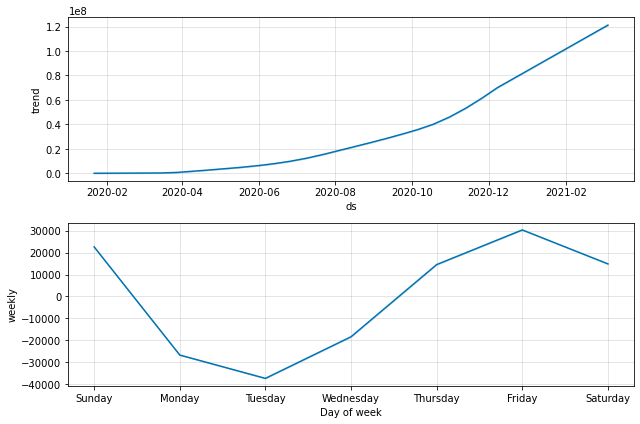

In [59]:
confirmed_forecast_plot =m.plot_components(forecast)

## Forecasting Worldwide Deaths using Prophet (Base model)

In [60]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
405,2021-03-02
406,2021-03-03
407,2021-03-04
408,2021-03-05
409,2021-03-06


In [61]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
405,2021-03-02,2.588773e+06,2.576650e+06,2.600879e+06
406,2021-03-03,2.602256e+06,2.589924e+06,2.615085e+06
407,2021-03-04,2.615438e+06,2.602801e+06,2.627783e+06
408,2021-03-05,2.628355e+06,2.615702e+06,2.641472e+06
409,2021-03-06,2.640066e+06,2.626239e+06,2.654136e+06


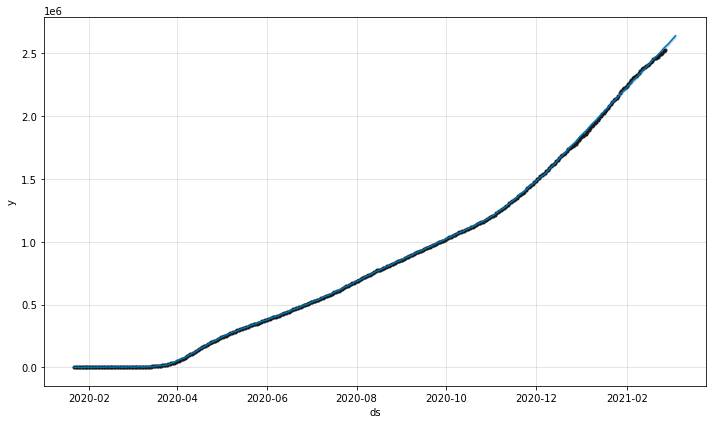

In [62]:
deaths_forecast_plot = m.plot(forecast)

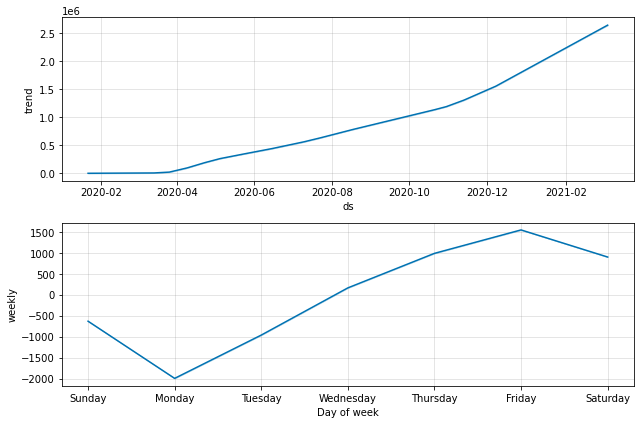

In [63]:
deaths_forecast_plot = m.plot_components(forecast)

## Forecasting Worldwide Recovered Cases with Prophet (Base model)

In [64]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
405,2021-03-02
406,2021-03-03
407,2021-03-04
408,2021-03-05
409,2021-03-06


In [65]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
405,2021-03-02,6.492704e+07,6.360360e+07,6.612468e+07
406,2021-03-03,6.523289e+07,6.396959e+07,6.647387e+07
407,2021-03-04,6.551699e+07,6.436006e+07,6.675471e+07
408,2021-03-05,6.579272e+07,6.459586e+07,6.707048e+07
409,2021-03-06,6.611427e+07,6.487143e+07,6.732656e+07


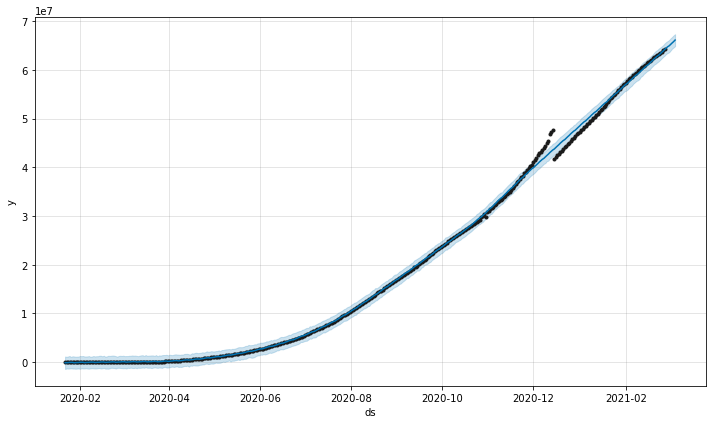

In [66]:
recovered_forecast_plot = m.plot(forecast)

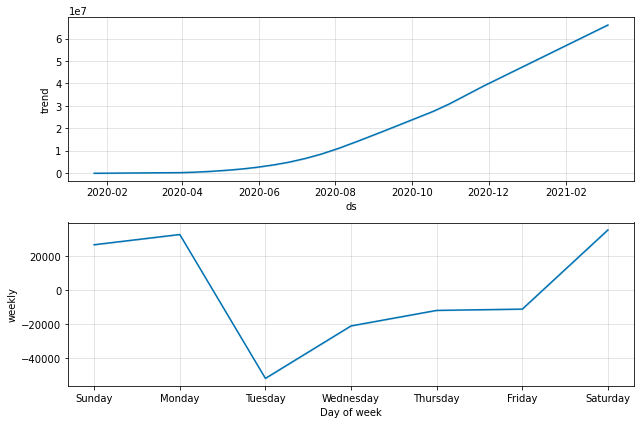

In [67]:
recovered_forecast_plot = m.plot_components(forecast)